In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
class Kmeans:
    def __init__(self, k:int = 3):
        self.K = k
        self.centroids = None
        
    def fit(self, x, num_iter:int = 100, random_seed:int = 42):
        n = x.shape[0]
        np.random.seed(random_seed)
        self.centroids = x[np.random.choice(n, size=self.K, replace=False),:] # (K, d)
        print(self.centroids.shape)
    
        for n_iter in range(num_iter):
            # print(self.centroids)
            # Find nearest centroids for each x
            idx = []
            self.loss = 0
            for i in range(n):
                idx.append(np.linalg.norm(x[i] - self.centroids, axis=1).argmin())
                self.loss += ((x[i] - self.centroids)*(x[i] - self.centroids)).sum(axis=1).min()
            idx = np.array(idx)
            # Update centroid using mean
            new_centroids = []
            for i in range(self.K):
                new_centroids.append(x[idx==i,:].mean(axis=0))
            if np.linalg.norm(np.array(new_centroids) - self.centroids) < 1e-7:
                break
            self.centroids = np.array(new_centroids)
    
    def predict(self, x):
        res = []
        n = x.shape[0]
        assert self.centroids!=None, "Fit the model first!!"
        for i in range(n):
            res.append(np.linalg.norm(x[i] - self.centroids, axis=1).argmin())
        return np.array(res)
        

In [5]:
data = np.random.uniform(0,100,(15,2))
model = Kmeans(2)
model.fit(data, random_seed=12)

(2, 2)


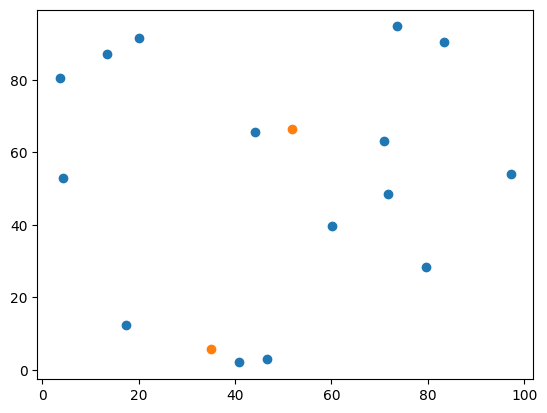

In [6]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(model.centroids[:,0],model.centroids[:,1])

# Generate Gaussian mixture data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(7)
centroids = np.random.uniform(-1,1,size=(6,2))
centroids[:,0]*=10
centroids[:,1]*=15

size = [100, 400, 180, 50, 250, 20]
std = [3,4,1,2,2.3,1.8]
points = {}
for i in range(6):
    nor = np.random.normal(size=(size[i],2))
    points[i] = (nor*std[i] + centroids[i])

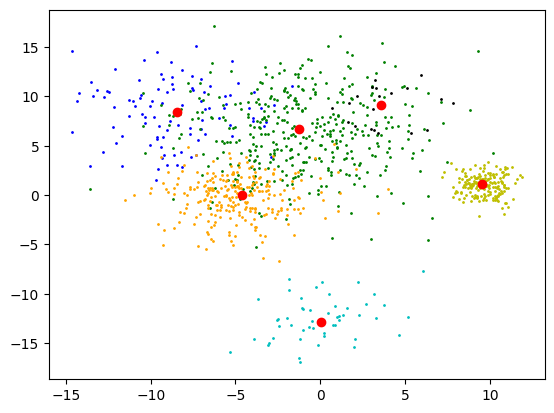

In [8]:

plt.scatter(points[0][:,0], points[0][:,1], s=1, color='b')
plt.scatter(points[1][:,0], points[1][:,1], s=1, color='g')
plt.scatter(points[2][:,0], points[2][:,1], s=1, color='y')
plt.scatter(points[3][:,0], points[3][:,1], s=1, color='c')
plt.scatter(points[4][:,0], points[4][:,1], s=1, color='orange')
plt.scatter(points[5][:,0], points[5][:,1], s=1, color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='r')

In [9]:
df_data = pd.DataFrame([(x,y,k) for k, v in points.items() for x,y in v])
df_data.columns = ['x', 'y', 'group']
df_data['centroids'] = df_data.group.map(lambda x: centroids[x])
df_data = df_data.sample(random_state=19,frac=1).reset_index(drop=True)

In [10]:
data = np.array(df_data[['x', 'y']])

In [11]:
model = Kmeans(6)
model.fit(data, random_seed=43)

(6, 2)


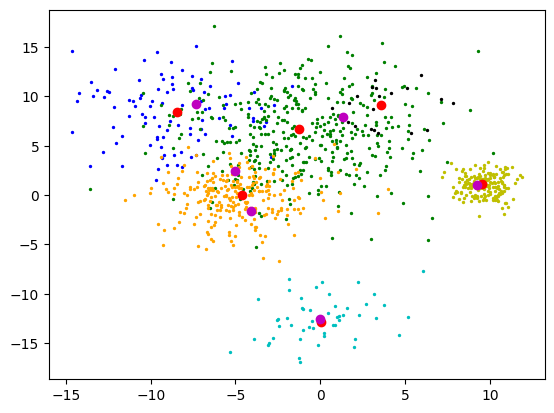

In [12]:
plt.scatter(points[0][:,0], points[0][:,1], s=2, color='b')
plt.scatter(points[1][:,0], points[1][:,1], s=2, color='g')
plt.scatter(points[2][:,0], points[2][:,1], s=2, color='y')
plt.scatter(points[3][:,0], points[3][:,1], s=2, color='c')
plt.scatter(points[4][:,0], points[4][:,1], s=2, color='orange')
plt.scatter(points[5][:,0], points[5][:,1], s=2, color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='r')
plt.scatter(model.centroids[:,0], model.centroids[:,1], color='m')

In [13]:
model.loss

10349.57311392341

### Pick best K

(2, 2)
(3, 2)
(4, 2)
(5, 2)
(6, 2)
(7, 2)
(8, 2)
(9, 2)
(10, 2)


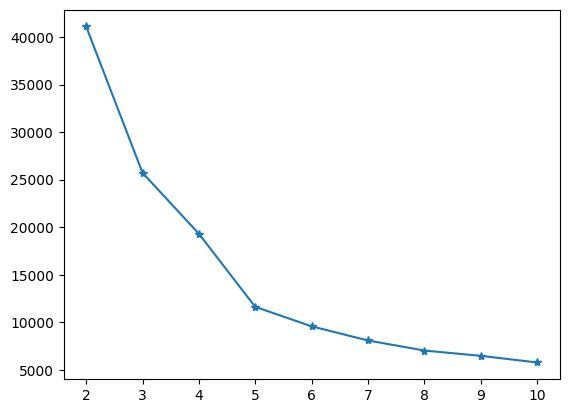

In [15]:
loss = []
Kmin, Kmax = 2, 10
for k in range(Kmin, Kmax+1):
    model = Kmeans(k)
    model.fit(data)
    loss.append(model.loss)
plt.plot(np.linspace(Kmin,Kmax,Kmax-Kmin+1), loss, marker='*')

(5, 2)


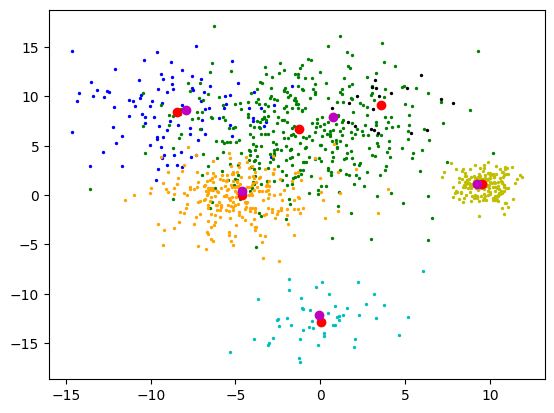

In [16]:
model = Kmeans(5)
model.fit(data)
plt.scatter(points[0][:,0], points[0][:,1], s=2, color='b')
plt.scatter(points[1][:,0], points[1][:,1], s=2, color='g')
plt.scatter(points[2][:,0], points[2][:,1], s=2, color='y')
plt.scatter(points[3][:,0], points[3][:,1], s=2, color='c')
plt.scatter(points[4][:,0], points[4][:,1], s=2, color='orange')
plt.scatter(points[5][:,0], points[5][:,1], s=2, color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='r')
plt.scatter(model.centroids[:,0], model.centroids[:,1], color='m')